In [9]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt  
import seaborn as sns

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew 

%matplotlib inline
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#learning new 
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

Reading the datasets:

In [10]:
# Read the datasets

business=pd.read_csv("yelp_business.csv")
business_attributes=pd.read_csv("yelp_business_attributes.csv")
business_hours=pd.read_csv("yelp_business_hours.csv")
reviews=pd.read_csv("yelp_review.csv")
check_in=pd.read_csv("yelp_checkin.csv")
tip=pd.read_csv("yelp_tip.csv")
user=pd.read_csv("yelp_user.csv")

Let's take a glimpse at the data

In [3]:
business.head(10)
business_attributes.head(10)
business_hours.head(10)
reviews.head(10)
check_in.head(10)
tip.head(10)
user.head(10)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants
6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,4.0,5,1,Real Estate Services;Real Estate;Home Services...
7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1.5,9,1,Shopping;Sporting Goods
8,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",NaN,"""2612 Brandt School Rd""",Wexford,PA,15090,40.615102,-80.091349,5.0,15,1,Coffee & Tea;Ice Cream & Frozen Yogurt;Food
9,TGWhGNusxyMaA4kQVBNeew,"""Detailing Gone Mobile""",NaN,"""""",Henderson,NV,89014,36.055825,-115.046350,5.0,7,1,Automotive;Auto Detailing


,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,...,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,FYWN1wneV18bWNgQjJ2GNg,Na,Na,Na,True,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,He-G7vWjzVUysIKrfNbPUQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,8DShNS-LuFqpEWIp0HxijA,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
3,PfOCPjBrlQAnz__NXj9h_w,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
4,o9eMRCWt5PkpLDE0gOPtcQ,Na,Na,Na,Na,False,False,False,False,False,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
5,kCoE3jvEtg6UVz5SOD3GVw,Na,Na,False,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
6,OD2hnuuTJI9uotcKycxg1A,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
7,EsMcGiZaQuG1OOvL9iUFug,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
8,TGWhGNusxyMaA4kQVBNeew,Na,Na,Na,True,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
9,XOSRcvtaKc_Q5H1SAzN20A,Na,Na,Na,Na,False,False,False,True,False,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


,business_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,FYWN1wneV18bWNgQjJ2GNg,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,None,None
1,He-G7vWjzVUysIKrfNbPUQ,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-16:0,8:0-16:0,None
2,KQPW8lFf1y5BT2MxiSZ3QA,None,None,None,None,None,None,None
3,8DShNS-LuFqpEWIp0HxijA,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,11:0-19:0
4,PfOCPjBrlQAnz__NXj9h_w,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-2:0,11:0-0:0
5,o9eMRCWt5PkpLDE0gOPtcQ,18:0-0:0,18:0-0:0,18:0-0:0,18:0-0:0,18:0-0:0,18:0-0:0,None
6,kCoE3jvEtg6UVz5SOD3GVw,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,None,None
7,OD2hnuuTJI9uotcKycxg1A,11:0-19:0,11:0-19:0,11:0-19:0,11:0-19:0,11:0-19:0,10:0-18:0,11:0-16:0
8,EsMcGiZaQuG1OOvL9iUFug,None,None,None,None,None,None,None
9,TGWhGNusxyMaA4kQVBNeew,9:0-18:0,9:0-18:0,9:0-18:0,9:0-18:0,9:0-18:0,9:0-18:0,9:0-18:0


,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0
5,HRPm3vEZ_F-33TYVT7Pebw,_4iMDXbXZ1p1ONG297YEAQ,8QWPlVQ6D-OExqXoaD2Z1g,5,2014-09-24,Cycle Pub Las Vegas was a blast! Got a groupon...,1,0,0
6,ymAUG8DZfQcFTBSOiaNN4w,u0LXt3Uea_GidxRW1xcsfg,9_CGhHMz8698M9-PkVf0CQ,4,2012-05-11,Who would have guess that you would be able to...,0,0,2
7,8UIishPUD92hXtScSga_gw,u0LXt3Uea_GidxRW1xcsfg,gkCorLgPyQLsptTHalL61g,4,2015-10-27,Always drove past this coffee house and wonder...,1,0,0
8,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,2013-02-09,"Not bad!! Love that there is a gluten-free, ve...",1,0,0
9,WF_QTN3p-thD74hqpp2j-Q,u0LXt3Uea_GidxRW1xcsfg,fDF_o2JPU8BR1Gya--jRIA,5,2016-04-06,Love this place!\n\nPeggy is great with dogs a...,3,0,0


,business_id,weekday,hour,checkins
0,7KPBkxAOEtb3QeIL9PEErg,Sat,1:00,3
1,kREVIrSBbtqBhIYkTccQUg,Sat,16:00,1
2,tJRDll5yqpZwehenzE2cSg,Thu,0:00,1
3,r1p7RAMzCV_6NPF0dNoR3g,Sat,23:00,1
4,mDdqgfrvROGAumcQdZ3HIg,Thu,22:00,1
5,nhZ1HGWD8lMErdn3FuWuTQ,Thu,2:00,1
6,vDoXZGE7p6xAkKQ0XQPvoA,Sat,23:00,1
7,8bY6M2yiWOF2ilfmGS34Fw,Fri,13:00,1
8,zNVot5_XHsxwfKdiFjk_aA,Sat,0:00,1
9,BH0K6SxPnY3wTRB7tA27hQ,Sat,2:00,1


,text,date,likes,business_id,user_id
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw
2,Happy hour 5-7 Monday - Friday,2016-10-12,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ
3,"Parking is a premium, keep circling, you will ...",2017-01-28,0,ESzO3Av0b1_TzKOiqzbQYQ,ulQ8Nyj7jCUR8M83SUMoRQ
4,Homemade pasta is the best in the area,2017-02-25,0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ
5,"Excellent service, staff is dressed profession...",2017-04-08,0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ
6,Come early on Sunday's to avoid the rush,2016-07-03,0,SqW3igh1_Png336VIb5DUA,ulQ8Nyj7jCUR8M83SUMoRQ
7,Love their soup!,2016-01-07,0,KNpcPGqDORDdvtekXd348w,ulQ8Nyj7jCUR8M83SUMoRQ
8,Soups are fantastic!,2016-05-22,0,KNpcPGqDORDdvtekXd348w,ulQ8Nyj7jCUR8M83SUMoRQ
9,Thursday night is $5 burger night,2016-06-09,0,KNpcPGqDORDdvtekXd348w,ulQ8Nyj7jCUR8M83SUMoRQ


,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0
5,Ob-2oGBQ7rwwYwUvhmnf7g,B,9,2012-05-01,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
6,JaTVvKsBl0bHHJEpESn4pQ,Peter,2,2013-03-23,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
7,Ykj0DVsz0c6rX9ghjd0hDg,Colleen,1,2010-10-10,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
8,kmyEPfKnHQJdTceCdoyMQg,A,7,2012-10-16,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
9,H54pA7YHfjl8IjhHAfdXJA,Chad,3,2010-06-25,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0


# 20 Most Popular Categories

Business Data:<br>
    How many different types businesses are there in Yelp and what are the top Categories?

In [28]:
categories_all=' '.join(business['categories'])  #joining the 'categories' features with an empty string. Returning values are strings
categories=pd.DataFrame(categories_all.split(';'),columns=['category']) #splitting in a column called category

x=categories.category.value_counts()
print("There are ",len(x)," different categories of Businesses in Yelp!")


There are  59106  different categories of Businesses in Yelp!


 There are <b> 59106 </b> different categories, Let's look at the 20 most commonly occuring businesses on Yelp 

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'The Top 20 categories')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0, 0.5, 'Number of Businesses')

Text(0.5, 0, 'Category')

Text(0.0, 19469.0, '19469')

Text(1.0, 13712.0, '13712')

Text(2.0, 10656.0, '10656')

Text(3.0, 6885.0, '6885')

Text(4.0, 6798.0, '6798')

Text(5.0, 6463.0, '6463')

Text(6.0, 6410.0, '6410')

Text(7.0, 6141.0, '6141')

Text(8.0, 5280.0, '5280')

Text(9.0, 4798.0, '4798')

Text(10.0, 4045.0, '4045')

Text(11.0, 3877.0, '3877')

Text(12.0, 3762.0, '3762')

Text(13.0, 3267.0, '3267')

Text(14.0, 3233.0, '3233')

Text(15.0, 3216.0, '3216')

Text(16.0, 2643.0, '2643')

Text(17.0, 2604.0, '2604')

Text(18.0, 2592.0, '2592')

Text(19.0, 2431.0, '2431')

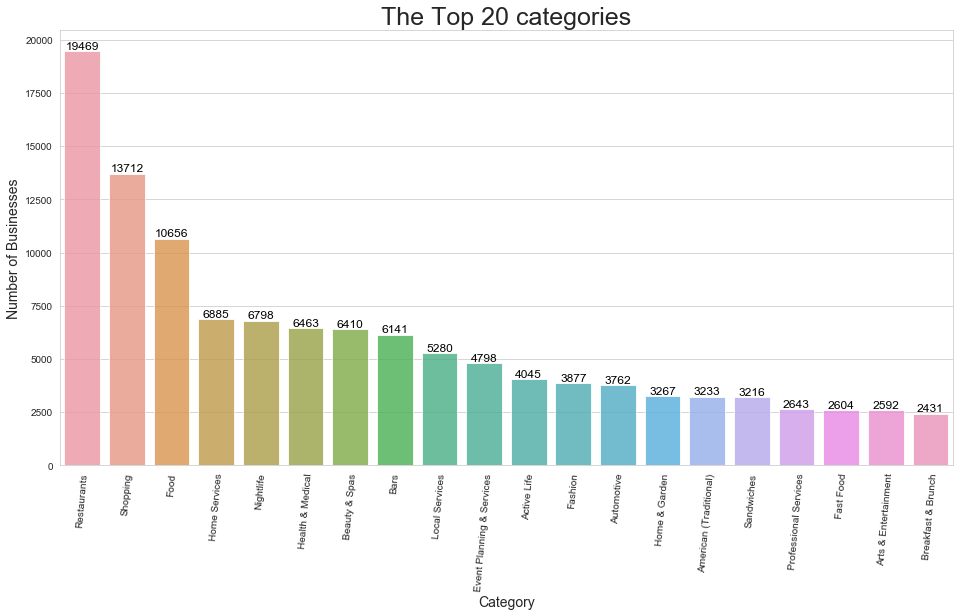

In [33]:
#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[:20]



#chart
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("The Top 20 categories",fontsize=25)
locs, labels = plt.xticks()

plt.setp(labels, rotation=85)
plt.ylabel('Number of Businesses', fontsize=14)
plt.xlabel('Category', fontsize=14)
   
    
    
    
for p in ax.patches:
    
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom') 
    
    
    
plt.show()




#  20 Cities with the most Reviews on Yelp 

In [30]:
bz= business['city'].value_counts()
bz = bz.sort_values(ascending=False)
bz= bz.iloc[:20]

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'The top 20 cities with the most reviews')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0, 0.5, 'Number of Reviews')

Text(0.5, 0, 'City')

Text(0.0, 26775.0, '26775')

Text(1.0, 17213.0, '17213')

Text(2.0, 17206.0, '17206')

Text(3.0, 8553.0, '8553')

Text(4.0, 8228.0, '8228')

Text(5.0, 6355.0, '6355')

Text(6.0, 5760.0, '5760')

Text(7.0, 5709.0, '5709')

Text(8.0, 4465.0, '4465')

Text(9.0, 4263.0, '4263')

Text(10.0, 3994.0, '3994')

Text(11.0, 3868.0, '3868')

Text(12.0, 3322.0, '3322')

Text(13.0, 3213.0, '3213')

Text(14.0, 3206.0, '3206')

Text(15.0, 3128.0, '3128')

Text(16.0, 2726.0, '2726')

Text(17.0, 2000.0, '2000')

Text(18.0, 1706.0, '1706')

Text(19.0, 1564.0, '1564')

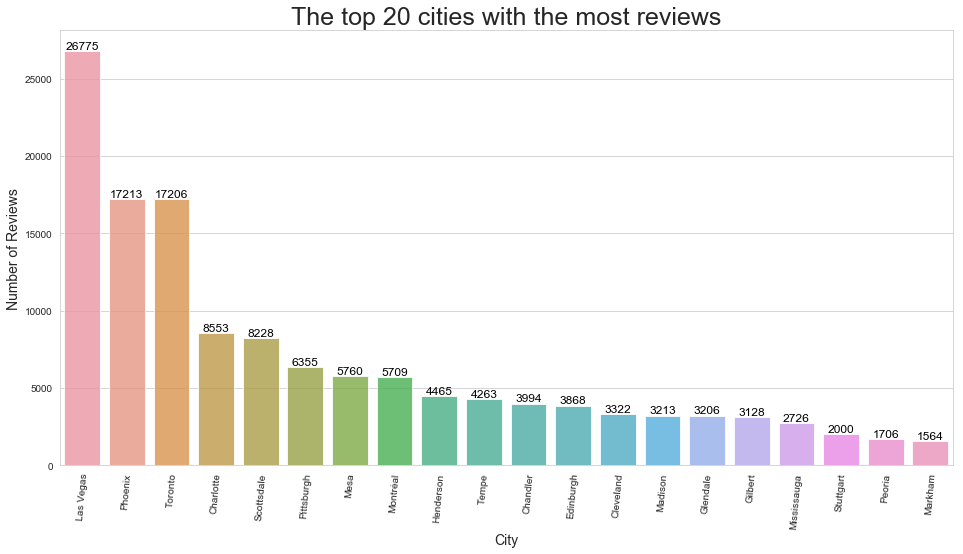

In [34]:
#chart
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
ax = sns.barplot(bz.index, bz.values, alpha=0.8)
plt.title("The top 20 cities with the most reviews",fontsize=25)
locs, labels = plt.xticks()

plt.setp(labels, rotation=85)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xlabel('City', fontsize=14)
   
    
    
    
for p in ax.patches:
    
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom') 
    
    
    
plt.show()



The cities with the most reviews are <b> Las Vegas</b>, <b>Phoenix</b> and <b>Toronto</b>.

# The Spread of the Popular Businesses in the Top 3 Cities

<b>Popularity = Number of Rating * Number of Stars</b><br>
To Map the businesses with their popularity we need their:<br>
1. longitude<br>
2. latitiude<br>
3. Popularity<br>

In [58]:
# Creating a custom column 
rating=business[['latitude','longitude','stars','review_count']]
rating['popularity']=rating['stars']*rating['review_count']


## Geo Mapping with Matplotlib <br>

###### 1. Las Vegas


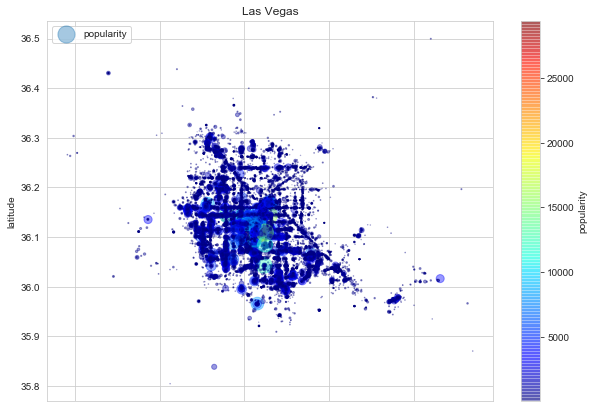

In [64]:

#a point inside vegas
lat = 36.1699
lon = -115.1398

lon_min, lon_max = lon-0.5,lon+0.5
lat_min, lat_max = lat-0.5,lat+0.5


rating_vegas=rating[(rating["longitude"]>lon_min) &\
                    (rating["longitude"]<lon_max) &\
                    (rating["latitude"]>lat_min) &\
                    (rating["latitude"]<lat_max)]

#Plot

rating_vegas.plot(kind="scatter", x="longitude", y="latitude",
    s=rating_vegas['popularity']/50, label="popularity",
    c="popularity", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7), title=("Las Vegas")
)
plt.legend()
plt.show()






###### 2. Phoenix

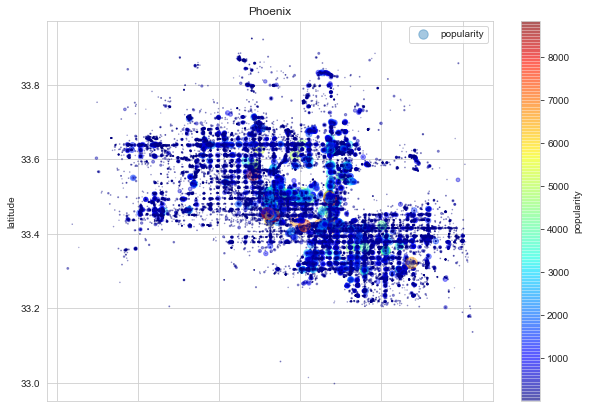

In [65]:

#a point inside Phoenix
lat = 33.4484
lon = -112.0740

lon_min, lon_max = lon-0.5,lon+0.5
lat_min, lat_max = lat-0.5,lat+0.5


rating_vegas=rating[(rating["longitude"]>lon_min) &\
                    (rating["longitude"]<lon_max) &\
                    (rating["latitude"]>lat_min) &\
                    (rating["latitude"]<lat_max)]

#Plot

rating_vegas.plot(kind="scatter", x="longitude", y="latitude",
    s=rating_vegas['popularity']/50, label="popularity",
    c="popularity", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7), title=("Phoenix")
)
plt.legend()
plt.show()


###### 3. Toronto

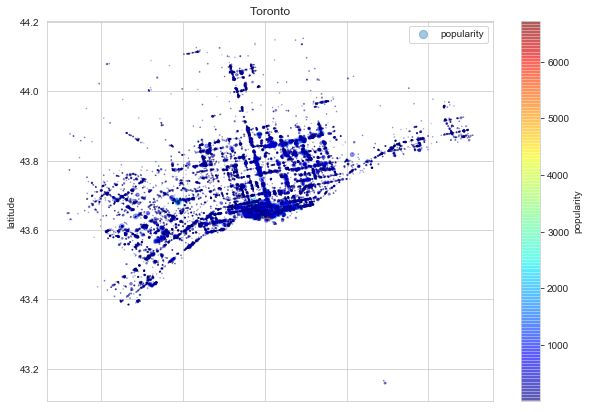

In [67]:
#a point inside Toronto
lat = 43.6532
lon = -79.3832

lon_min, lon_max = lon-0.5,lon+0.5
lat_min, lat_max = lat-0.5,lat+0.5


rating_vegas=rating[(rating["longitude"]>lon_min) &\
                    (rating["longitude"]<lon_max) &\
                    (rating["latitude"]>lat_min) &\
                    (rating["latitude"]<lat_max)]

#Plot

rating_vegas.plot(kind="scatter", x="longitude", y="latitude",
    s=rating_vegas['popularity']/50, label="popularity",
    c="popularity", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7), title=("Toronto")
)
plt.legend()
plt.show()





# Businesses with the most 5 Star Reviews